In [1]:
# import code
from simulation import Simulation
from simulation import Ambulance

# Scenario #1: Basic Demo
## 1. Build a City
First, let's build a city of 5 intersections by 5 intersections with three ambulances. The maximum amount of time to travel a city block will be 4 minutes.

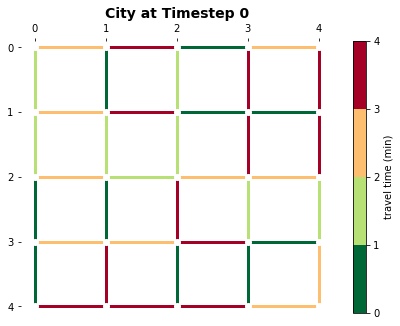

In [2]:
demo_simulation = Simulation(city_size=5, min_ambulance=3, max_time=4, p_int=1, seed=42)
demo_simulation.show_city()

## 2. Place Ambulances
Now, we solve a Constraint Satisfaction Problem to ensure that an ambulance is within $t=6$ minutes of any city intersection.

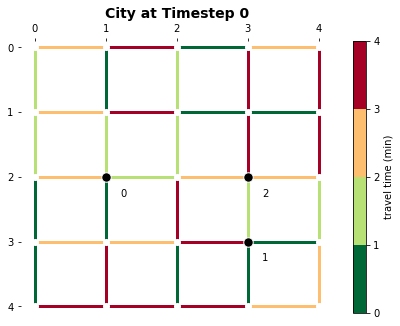

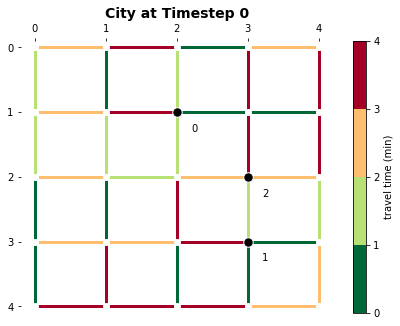

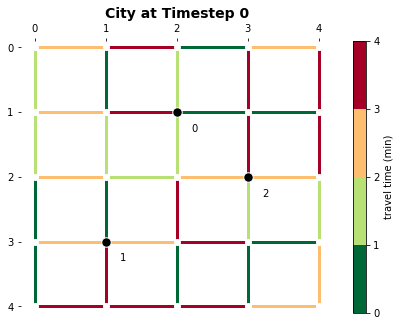

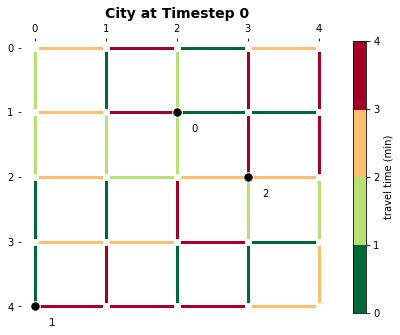

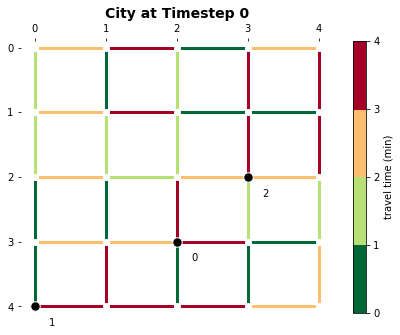

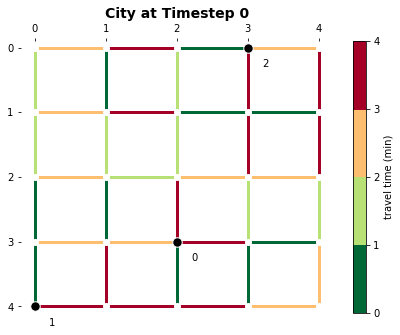

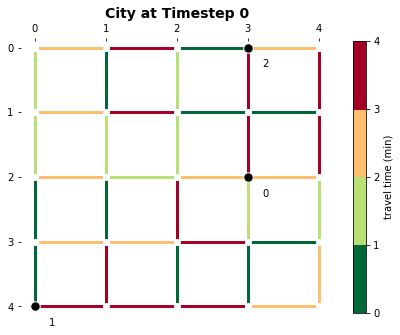

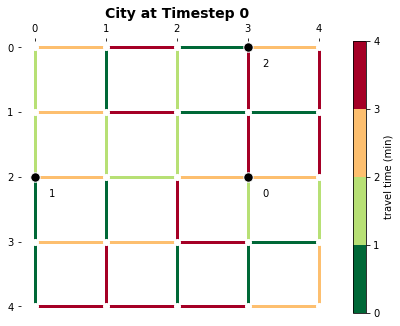

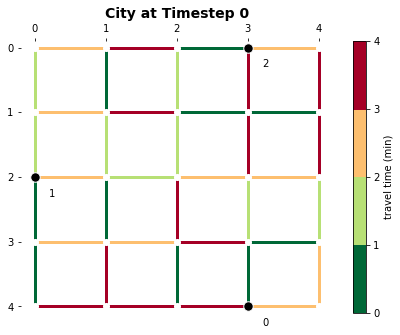

In [3]:
demo_simulation.csp_ambulance(guarantee_time=6, verbose=True)

## 3. An Accident Occurs
When an accident occurs, the simulation automatically takes two steps:

  1. **It solves a Markov Decision Process** for a policy. The policy denotes which direction an ambulance should move from any intersection to reach the accident as quickly as possible.
  2. **It assigns a responding ambulance** according to the ambulance with the fastest route based on the policy.

Accident location:  [0 2]

Policy: 
A=accident, n=north, s=south, e=east, w=west
[['e' 'e' 'A' 'w' 'w']
 ['e' 'n' 'n' 'w' 'w']
 ['e' 'e' 'n' 'w' 'n']
 ['n' 'n' 'n' 'n' 'w']
 ['n' 'n' 'n' 'n' 'n']]

Responding ambulance:  2



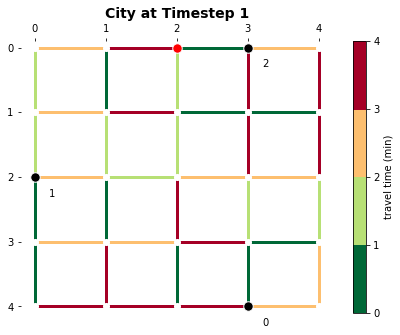

In [4]:
demo_simulation.step()    
print('Accident location: ', demo_simulation.accident_location)
print('\nPolicy: \nA=accident, n=north, s=south, e=east, w=west')
demo_simulation.show_policy((demo_simulation.accident_location[0],demo_simulation.accident_location[1]))
print('\nResponding ambulance: ', demo_simulation.responding_ambulance_id)
print('')
demo_simulation.show_city()

## 4. Ambulance Responds
The responding ambulance moves toward the accident according to the policy. 

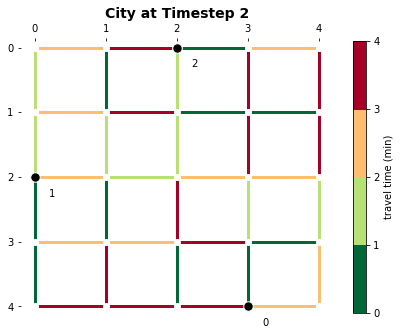

In [5]:
while not demo_simulation.ambulance_reached:
    demo_simulation.step()
    demo_simulation.show_city()

# Scenario #2: Unpredictability of Movement
In this scenario, an ambulance has a 60 percent chance of moving in an intended direction and a 20 percent chance of moving in each perpendicular direction. We use the same city specifications as in the demo above.

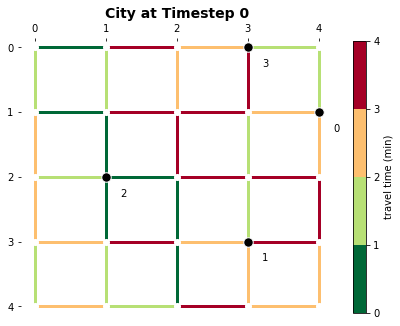

In [6]:
scenario_2 = Simulation(city_size=5, min_ambulance=3, max_time=4, p_int=0.6, seed=400)
scenario_2.csp_ambulance(guarantee_time=6, verbose=False)
scenario_2.show_city()

Accident location:  [4 3]

Policy: 
A=accident, n=north, s=south, e=east, w=west
[['s' 's' 's' 's' 's']
 ['s' 's' 's' 's' 's']
 ['s' 's' 's' 's' 's']
 ['e' 'e' 's' 's' 's']
 ['e' 'e' 'e' 'A' 'w']]
Previous policy from demo: 
[['e' 'e' 'A' 'w' 'w']
 ['e' 'n' 'n' 'w' 'w']
 ['e' 'e' 'n' 'w' 'n']
 ['n' 'n' 'n' 'n' 'w']
 ['n' 'n' 'n' 'n' 'n']]

Responding ambulance:  1



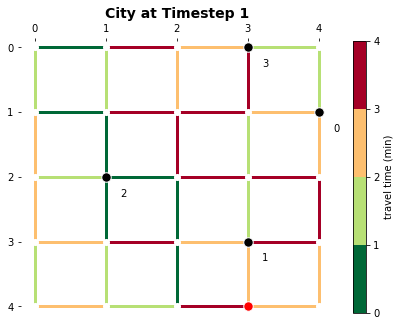

In [7]:
scenario_2.step()    
print('Accident location: ', scenario_2.accident_location)
print('\nPolicy: \nA=accident, n=north, s=south, e=east, w=west')
scenario_2.show_policy((scenario_2.accident_location[0],scenario_2.accident_location[1]))
print('Previous policy from demo: ')
demo_simulation.show_policy((demo_simulation.accident_location[0],demo_simulation.accident_location[1]))
print('\nResponding ambulance: ', scenario_2.responding_ambulance_id)
print('')
scenario_2.show_city()

Ambulance #1 responds according to the policy, with some missteps along the way:

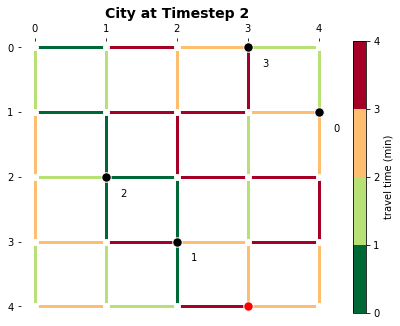

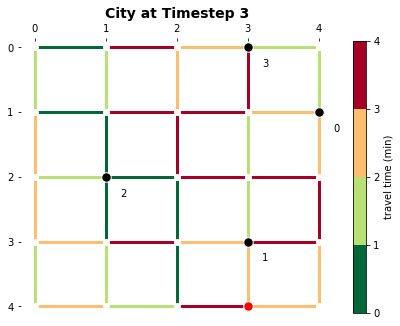

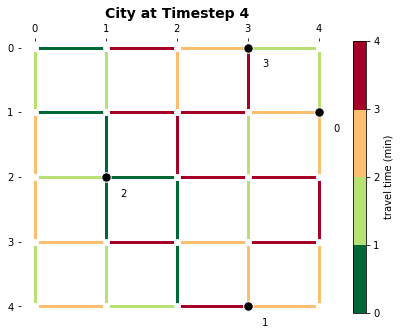

In [8]:
while not scenario_2.ambulance_reached:
    scenario_2.step()
    scenario_2.show_city()

# Scenario #3: Increased City Size
In this scenario, we increase the city size to be 10 blocks by 10 blocks.

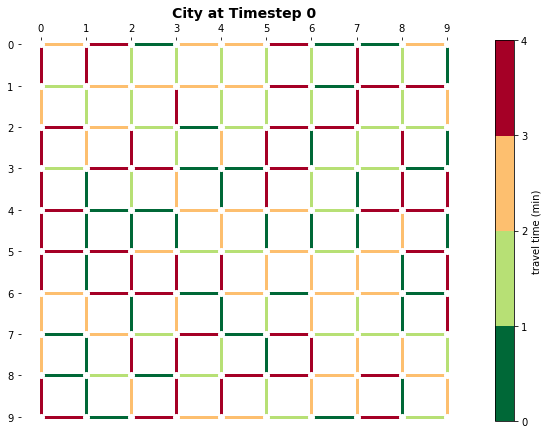

In [9]:
scenario_2 = Simulation(city_size=10, min_ambulance=3, max_time=4, p_int=1, seed=42)
scenario_2.show_city(size=(10,7))

CPU times: user 3.15 s, sys: 37.5 ms, total: 3.18 s
Wall time: 3.19 s


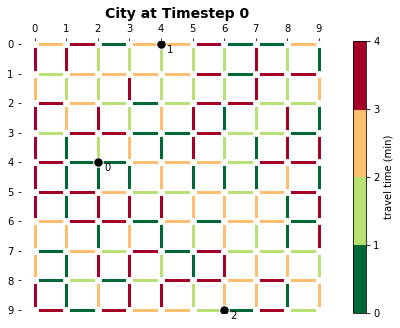

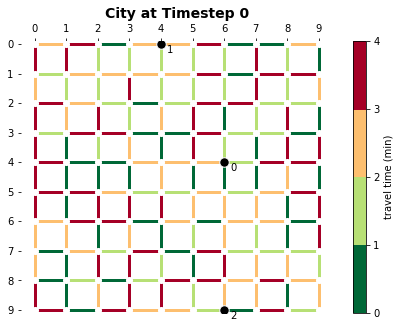

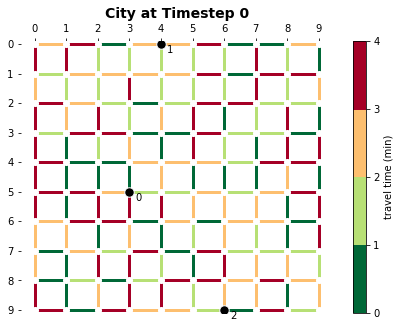

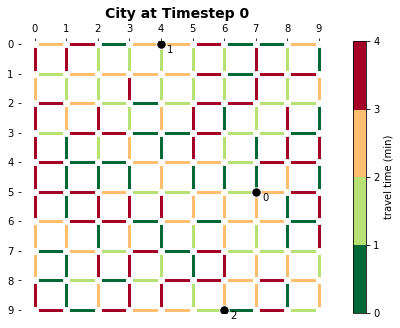

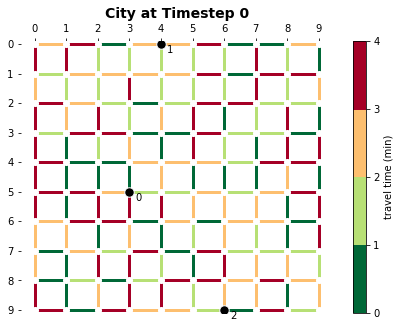

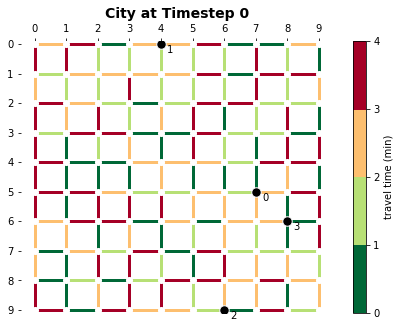

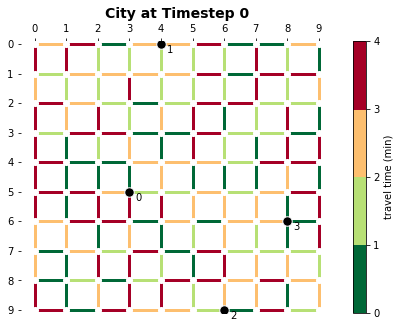

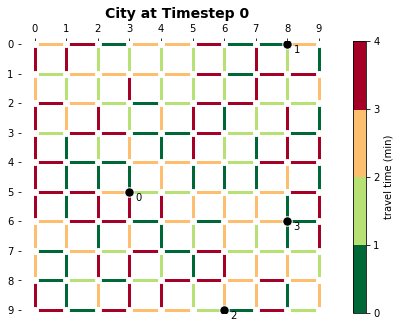

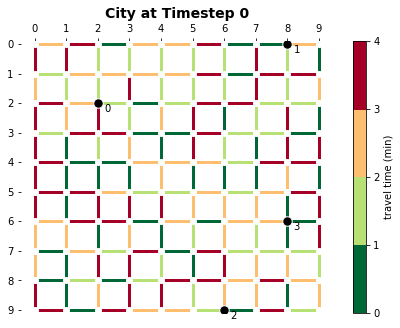

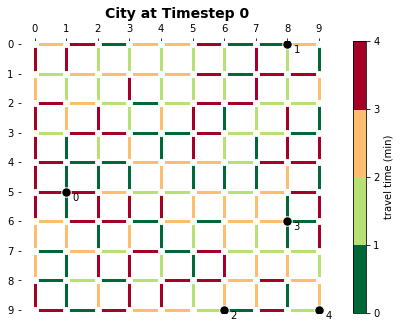

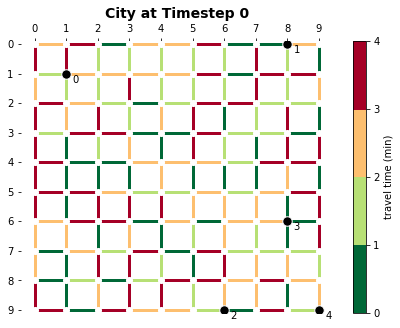

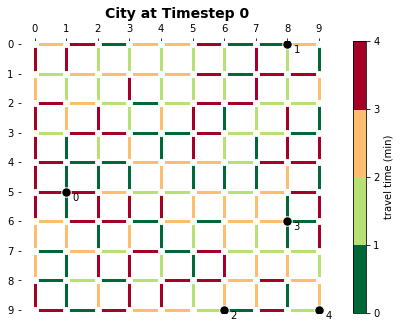

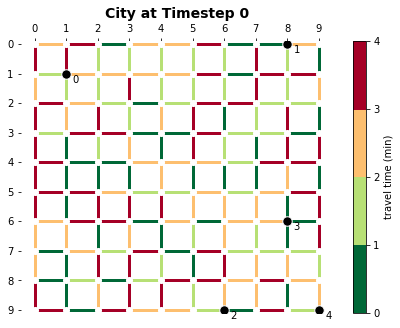

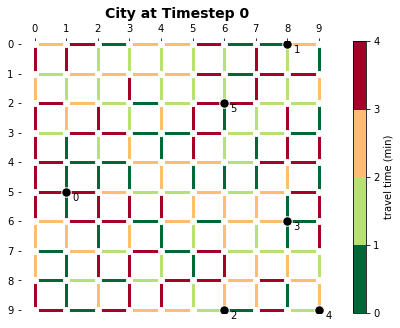

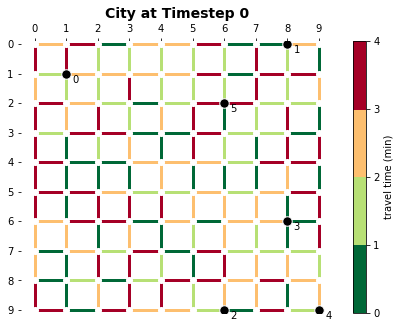

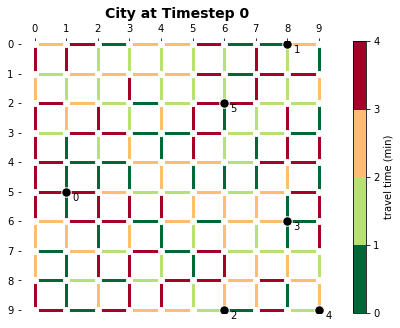

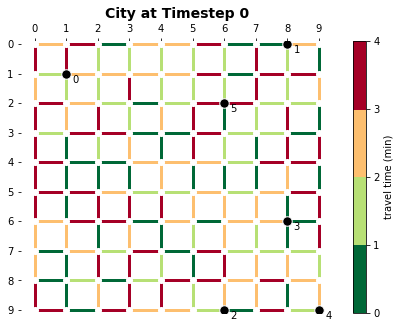

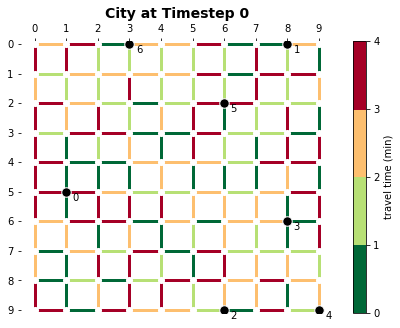

In [10]:
%%time
scenario_2.csp_ambulance(guarantee_time=10, csp_iterations=4, num_blocks=4, verbose=True)

Accident location:  [3 4]

Policy: 
A=accident, n=north, s=south, e=east, w=west
[['s' 'e' 's' 's' 's' 's' 's' 'w' 'w' 's']
 ['e' 's' 's' 's' 's' 's' 's' 'w' 's' 's']
 ['e' 'e' 'e' 's' 's' 'w' 's' 's' 'w' 's']
 ['e' 'e' 'e' 'e' 'A' 'w' 'w' 'w' 'w' 'w']
 ['e' 'e' 'e' 'n' 'n' 'w' 'n' 'n' 'w' 'n']
 ['e' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'w' 'n']
 ['e' 'n' 'n' 'e' 'n' 'n' 'w' 'n' 'n' 'w']
 ['e' 'n' 'n' 'n' 'n' 'w' 'n' 'n' 'n' 'w']
 ['e' 'n' 'e' 'e' 'n' 'n' 'w' 'n' 'n' 'n']
 ['n' 'n' 'n' 'n' 'n' 'n' 'w' 'w' 'n' 'w']]

Responding ambulance:  5

CPU times: user 15.5 s, sys: 99.9 ms, total: 15.6 s
Wall time: 15.7 s


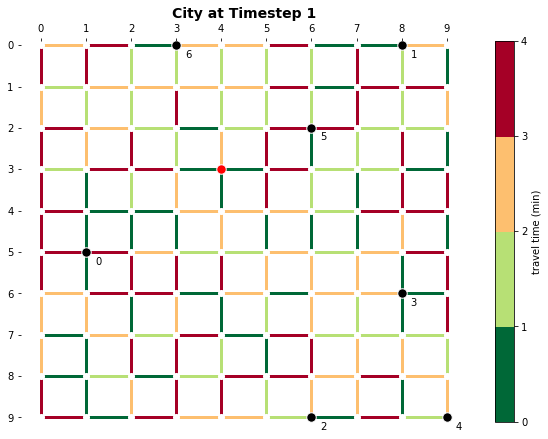

In [11]:
%%time
scenario_2.step()    
print('Accident location: ', scenario_2.accident_location)
print('\nPolicy: \nA=accident, n=north, s=south, e=east, w=west')
scenario_2.show_policy((scenario_2.accident_location[0],scenario_2.accident_location[1]))
print('\nResponding ambulance: ', scenario_2.responding_ambulance_id)
print('')
scenario_2.show_city(size=(10,7))

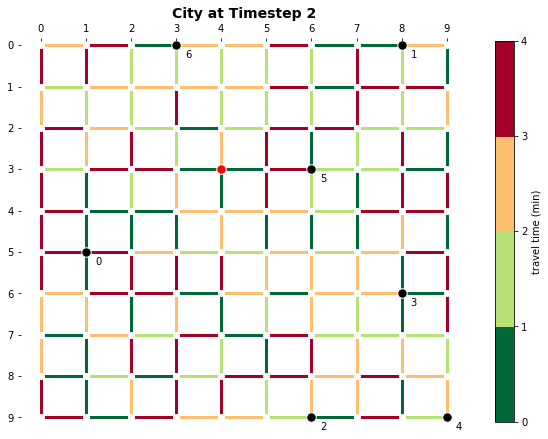

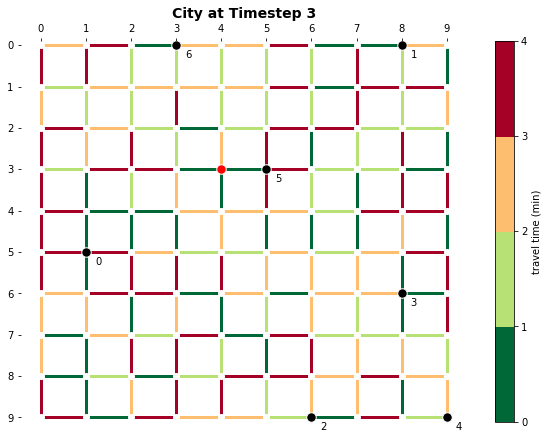

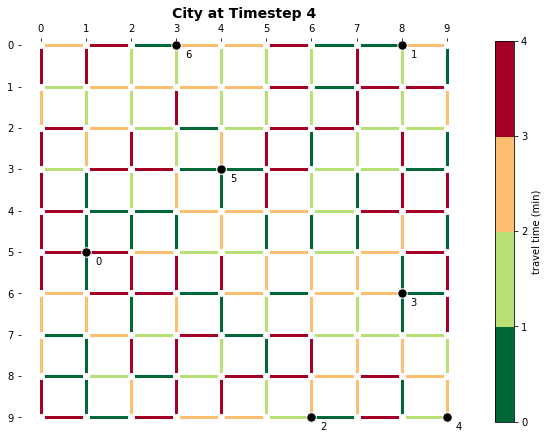

In [12]:
while not scenario_2.ambulance_reached:
    scenario_2.step()
    scenario_2.show_city(size=(10,7))